# U.S. oil and gas Production analysis

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [51]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [52]:
gas_df.shape

(121, 20)

In [53]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [54]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    object
U.S.      int64
dtype: object

In [55]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')

In [56]:
gas_df.dtypes[0:2] # Checking the types of the first two columns.

Month    datetime64[ns]
U.S.              int64
dtype: object

In [57]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [58]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

In [59]:
month_type = gas_df['Month'].dtype

---

## Yearly Gas production

In [65]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Text(0.5, 0, 'Year')

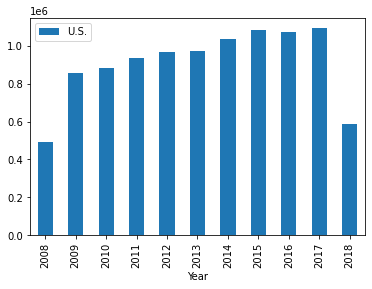

In [76]:
US_gas_df = yearly_gas_df.filter(items = ["U.S."]).plot(kind="bar")
US_gas_df.set_xlabel("Year")

In [83]:
full_years = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)

Text(0.5, 0, 'Year')

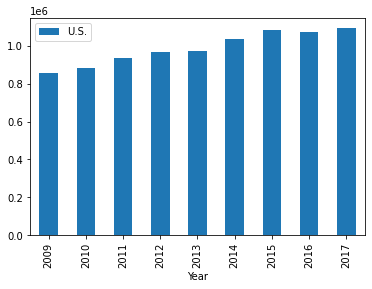

In [85]:
filtered_yearly_gas_df = yearly_gas_df[full_years]
filtered_yearly_gas_df
plot = filtered_yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

### State production

Let's have a look at the yearly production of some specific states

In [86]:
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

Text(0.5, 0, 'Year')

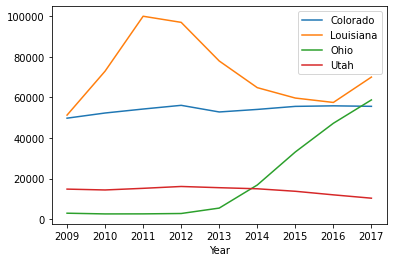

In [91]:
plot = filtered_yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()
plot.set_xlabel("Year")

### Check your code

In [92]:
from nbresult import ChallengeResult

result = ChallengeResult('gas',
    month_type=month_type,
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

In [93]:
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/02-Data-Toolkit/01-Data-Analysis/02-US-Oil-and-Gas-Production
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_gas.py::TestGas::test_month_column_is_a_datetime PASSED       [ 50%]
tests/test_gas.py::TestGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 2 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/gas.pickle

git commit -m 'Completed gas step'

git push origin master


---

## Comparing with Crude Oil Production

In [94]:
file = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file)
oil_df['Month'] = pd.to_datetime(oil_df['Month'], format='%Y-%m-%d')
oil_df.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [95]:
yearly_gas = gas_df.groupby(gas_df['Month'].dt.year).sum().filter(items=['U.S.'])
yearly_gas.columns = [ 'Gas' ]
yearly_gas.head(3)

,Gas
Month,
2008,489473
2009,856876
2010,881622


In [96]:
yearly_oil = oil_df.groupby(oil_df['Month'].dt.year).sum().filter(items=['U.S. Crude Oil '])
yearly_oil.columns = [ 'Crude Oil' ]
yearly_oil.head(3)

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741


In [97]:
merged_df = pd.concat([yearly_oil, yearly_gas], axis='columns')
merged_df

,Crude Oil,Gas
Month,,
2008,34211,489473
2009,64180,856876
2010,65741,881622
2011,67829,936163
2012,78007,968632
2013,89585,970617
2014,105064,1032439
2015,113179,1082158
2016,105970,1070085


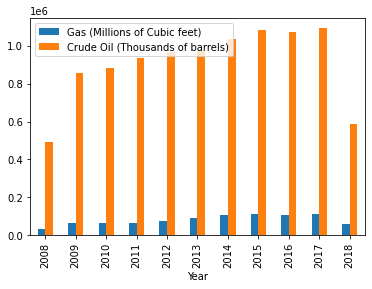

In [98]:
plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)'])

### Check your code

In [101]:
from nbresult import ChallengeResult

result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,
    yearly_oil_2008=merged_df.iloc[0]["Crude Oil"],
)
result.write()

In [102]:
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/02-Data-Toolkit/01-Data-Analysis/02-US-Oil-and-Gas-Production
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
tests/test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2008 PASSED [100%]

============================== 2 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master
